In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.special as sp

In [2]:
def func_Gamma(alpha, scale, x):
    y = 1/((sp.gamma(alpha) * (scale**alpha)))
    temp = np.exp(-x/scale)
    y = y*(np.power(x,(alpha-1)))*temp
    return y

In [3]:
def likelihood(x1,y1):    
    factorials = np.apply_along_axis(lambda x: sp.gamma(x+1), axis=0, arr=y1)
    lik = np.exp(-x1*y1.size)*(x1**y1.sum())
    lik = lik/np.multiply.reduce(factorials)
    return lik

def posterior_up_to_constant(x1,y1,i):
    return likelihood(x1,y1)*func_Gamma(param_alpha[i], param_scale[i], x1)

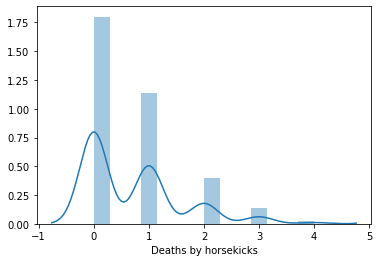

In [4]:
data = pd.read_csv('Poisson.csv')

df = data.drop(['Corps','Totals'], axis = 1)
df = df.drop(14, axis = 0)
df_arr = df.to_numpy() 
df_arr = df_arr.reshape(280)
sns.distplot(df_arr, axlabel = 'Deaths by horsekicks')

In [5]:
MLE = np.zeros(14)
MLE_246 = np.zeros(3)
RMSE = np.zeros(14)
for i in range(0,14):
    print("Corp", data.loc[i][0],":")
    hk_13 = list(data.iloc[i][1:14])
    hk_13 = np.array(hk_13)
    MLE[i] = round(sum(hk_13)/len(hk_13))
    if(i==2 or i==4 or i==6):
        j = int((i/2)-1)
        MLE_246[j] = sum(hk_13)/len(hk_13)
    print("MLE = ", MLE[i])
    temp = 0
    
    hk_Test = np.array(list(data.iloc[i][14:21]))
    for j in range(0,hk_Test.shape[0]):
        temp = temp + ((MLE[i]-hk_Test[j])**2)
        
    RMSE[i] = ((1/len(hk_13))*temp)**(1/2)    
    print("RMSE = ", RMSE[i])

Corp G :
MLE =  1.0
RMSE =  0.5547001962252291
Corp I :
MLE =  1.0
RMSE =  0.7844645405527362
Corp II :
MLE =  1.0
RMSE =  0.6201736729460423
Corp III :
MLE =  1.0
RMSE =  0.6201736729460423
Corp IV :
MLE =  0.0
RMSE =  0.3922322702763681
Corp V :
MLE =  0.0
RMSE =  0.6793662204867574
Corp VI :
MLE =  1.0
RMSE =  0.7337993857053429
Corp VII :
MLE =  1.0
RMSE =  0.6793662204867574
Corp VIII :
MLE =  0.0
RMSE =  0.4803844614152614
Corp IX :
MLE =  1.0
RMSE =  0.6201736729460423
Corp X :
MLE =  1.0
RMSE =  0.7337993857053429
Corp XI :
MLE =  1.0
RMSE =  0.8320502943378437
Corp XIV :
MLE =  1.0
RMSE =  0.5547001962252291
Corp XV :
MLE =  0.0
RMSE =  0.7844645405527362


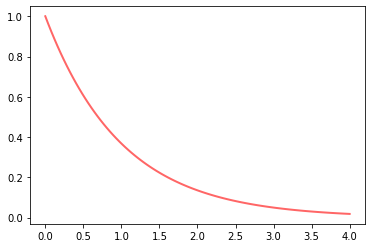

In [6]:
fig, ax = plt.subplots(1, 1)
a = 1
x = np.linspace(0, 4, 100)
ax.plot(x, func_Gamma(a, 1, x),
       'r-', lw=2, alpha=0.6, label='gamma pdf')

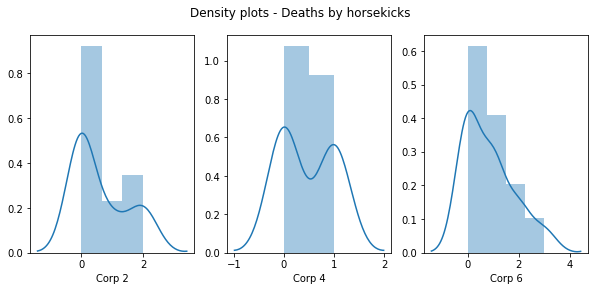

In [7]:
corps_246 = np.zeros([3,13])
fig, ax = plt.subplots(1,3)
for i in range(2,8,2): 
    j = int((i/2)-1)
    corps_246[j] = np.array(list(data.iloc[i][1:14]))
    sns.distplot(corps_246[j], ax=ax[j])
fig.suptitle('Density plots - Deaths by horsekicks')
ax[0].figure.set_figwidth(10)
ax[0].set_xlabel('Corp 2')
ax[1].set_xlabel('Corp 4')
ax[2].set_xlabel('Corp 6')
fig.show()

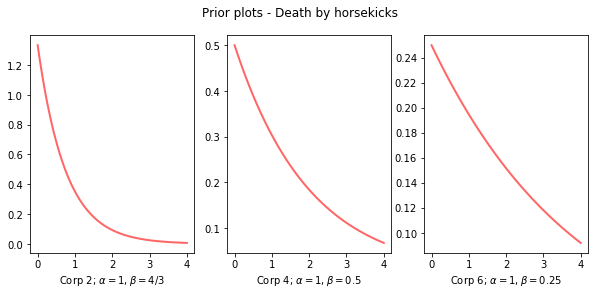

In [8]:
fig, ax = plt.subplots(1,3)
param_alpha = [1, 1, 1]
param_scale = [0.75, 2, 4]
x = np.linspace(0, 4, 100)
ax[0].figure.set_figwidth(10)
for i in range(0,3):
    ax[i].plot(x, func_Gamma(param_alpha[i], param_scale[i], x), 
               'r-', lw=2, alpha=0.6, label='gamma pdf')
fig.suptitle('Prior plots - Death by horsekicks')
ax[0].set_xlabel(r'Corp 2; $\alpha = 1, \beta = 4/3$')
ax[1].set_xlabel(r'Corp 4; $\alpha = 1, \beta = 0.5$')
ax[2].set_xlabel(r'Corp 6; $\alpha = 1, \beta = 0.25$')
fig.show()

Text(0.5, 0.98, 'Likelihood plots')

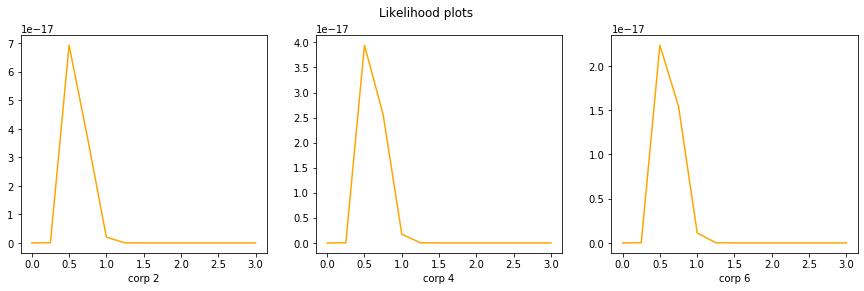

In [9]:
fig, ax = plt.subplots(1, 3)
ax[0].figure.set_figwidth(15)
x1 = np.linspace(start=0, stop=3, num=13)
y1 = np.zeros((3,13))
for i in range(y1.shape[0]):
    temp = (i*2)+2
    y1[i] = list(data.iloc[temp][1:14])

for i in range(y1.shape[0]):
    ax[i].plot(x1, posterior_up_to_constant(x1,y1,i), c='orange')
    temp = 'corp '+ str((i*2)+2)
    ax[i].set_xlabel(temp)
    
fig.suptitle('Likelihood plots')

MLE estimates
corp -  2 : 0.6153846153846154
corp -  4 : 0.46153846153846156
corp -  6 : 0.8461538461538461


Text(0.5, 0, 'Corp 6')

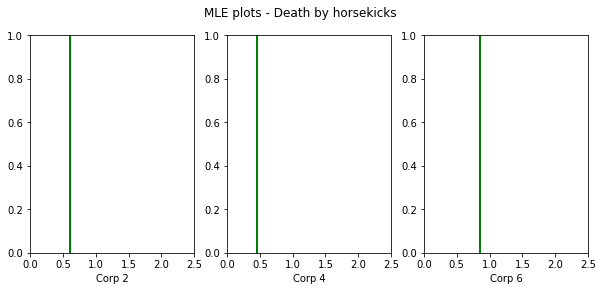

In [10]:
fig, ax = plt.subplots(1,3)
ax[0].figure.set_figwidth(10)
print("MLE estimates")

for i in range(0,3):
    ax[i].axvline(x = MLE_246[i], ymin = 0, ymax=4, linewidth = 2, color = 'g')
    ax[i].xaxis.set_ticks(np.arange(0, 3, 0.5))
    print("corp - ",(i*2+2),":",MLE_246[i])

fig.suptitle('MLE plots - Death by horsekicks')
ax[0].set_xlabel('Corp 2')
ax[1].set_xlabel('Corp 4')
ax[2].set_xlabel('Corp 6')

Text(0.5, 0.98, 'Posterior plots')

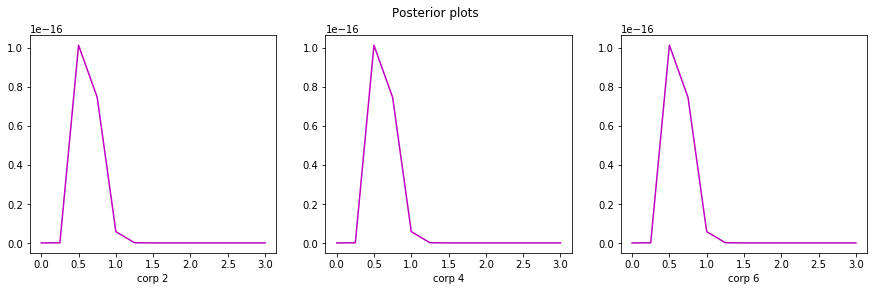

In [11]:
fig, ax = plt.subplots(1, 3)
ax[0].figure.set_figwidth(15)
x1 = np.linspace(start=0, stop=3, num=13)
y1 = np.zeros((3,13))
for i in range(y1.shape[0]):
    temp = (i*2)+2
    y1[i] = list(data.iloc[temp][1:14])

for i in range(y1.shape[0]):
    ax[i].plot(x1, likelihood(x1,y1), c='m')
    temp = 'corp '+ str((i*2)+2)
    ax[i].set_xlabel(temp)
    
fig.suptitle('Posterior plots')

MAP estimates
corp -  2 : 0.5581395348837209
corp -  4 : 0.4444444444444444
corp -  6 : 0.8301886792452831


Text(0.5, 0, 'Corp 6')

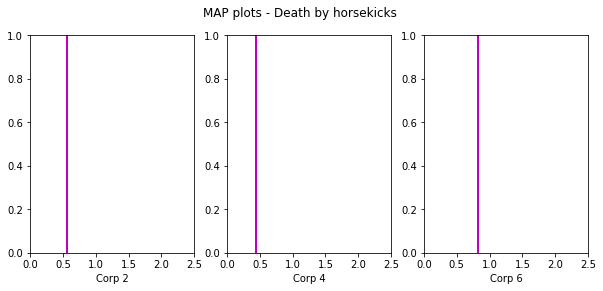

In [12]:
fig, ax = plt.subplots(1,3)
ax[0].figure.set_figwidth(10)
MAP_Lamda = np.zeros(3) 
print("MAP estimates")

for i in range(0,3):
    Beta = 1/(param_scale[i])
    MAP_Lamda[i] = (param_alpha[i]-1+sum(y1[i]))/(Beta+13)
    ax[i].axvline(x = MAP_Lamda[i], ymin = 0, ymax=4, linewidth = 2, color = 'm')
    ax[i].xaxis.set_ticks(np.arange(0, 3, 0.5))
    print("corp - ",(i*2+2),":",MAP_Lamda[i])
    
fig.suptitle('MAP plots - Death by horsekicks')
ax[0].set_xlabel('Corp 2')
ax[1].set_xlabel('Corp 4')
ax[2].set_xlabel('Corp 6')

Text(0.5, 0.98, 'All plots - Death by horsekicks')

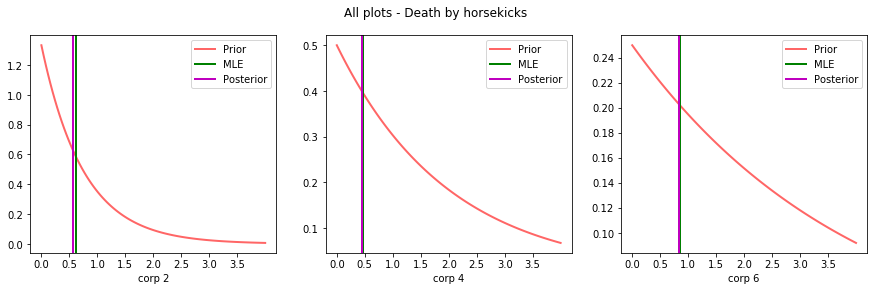

In [13]:
fig, ax = plt.subplots(1,3)
ax[0].figure.set_figwidth(15)
for i in range(0,3):
    ax[i].plot(x, func_Gamma(param_alpha[i], param_scale[i], x), 
               'r-', lw=2, alpha=0.6, label='Prior')
    ax[i].axvline(x = MLE_246[i], ymin = 0, ymax=4, linewidth = 2, color = 'g', label = 'MLE')
    ax[i].axvline(x = MAP_Lamda[i], ymin = 0, ymax=4, linewidth = 2, color = 'm', label = 'Posterior')
    ax[i].xaxis.set_ticks(np.arange(0, 4, 0.5))
    ax[i].legend()
    temp = 'corp '+ str((i*2)+2)
    ax[i].set_xlabel(temp)
fig.suptitle('All plots - Death by horsekicks')